## Importing Libraries

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Importing nltk libraries
import re
import string
import missingno
 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
 

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore") 

ModuleNotFoundError: No module named 'scikitplot'

In [6]:
# Loading Dataset
df = pd.read_csv("Ratings_Dataset.csv")
df 

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Nice looks and quick responsive.,Purchased it on the 1st day and it’s a very go...,5.0 out of 5 stars
1,1,Light weighted and fast,Very fast and good looking. Processsor speed i...,5.0 out of 5 stars
2,2,Laptop bag missing,Laptop bag missing,2.0 out of 5 stars
3,3,Okayish,"Performance wise it's okay , it's been only a ...",2.0 out of 5 stars
4,4,Low quality,Performance issue,2.0 out of 5 stars
...,...,...,...,...
65253,65253,Best in the market!,Nice product ☺️👍,5
65254,65254,Best in the market!,Lovely watch with mobile like features.....jus...,5
65255,65255,Delightful,Nice,4
65256,65256,Highly recommended,superb watch smooth and classic👌👌👌👌👌\now super...,5


## Exploratory Data Analysis

In [7]:
# Remove unwanted column 'Unnamed: 0'
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 65258 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Nice looks and quick responsive.,Purchased it on the 1st day and it’s a very go...,5.0 out of 5 stars
1,Light weighted and fast,Very fast and good looking. Processsor speed i...,5.0 out of 5 stars
2,Laptop bag missing,Laptop bag missing,2.0 out of 5 stars
3,Okayish,"Performance wise it's okay , it's been only a ...",2.0 out of 5 stars
4,Low quality,Performance issue,2.0 out of 5 stars
5,Keys not working,Some of the keys stopped working within a 6 mo...,2.0 out of 5 stars
6,For basic use also it is not supporting,Friends I am using this laptop since 1 month I...,2.0 out of 5 stars
7,Important information,If you are planning to install and additional ...,2.0 out of 5 stars
8,bettry avrage is max 2 or 3 hours,bettry backup mention in discription 10 hr of ...,2.0 out of 5 stars
9,Quality of display visibility and clarity is v...,NaN,2.0 out of 5 stars


In [8]:
# checking for missing values
df.isna().sum() 

Review_title    8114
Review_text     7691
Ratings         8111
dtype: int64

<AxesSubplot:>

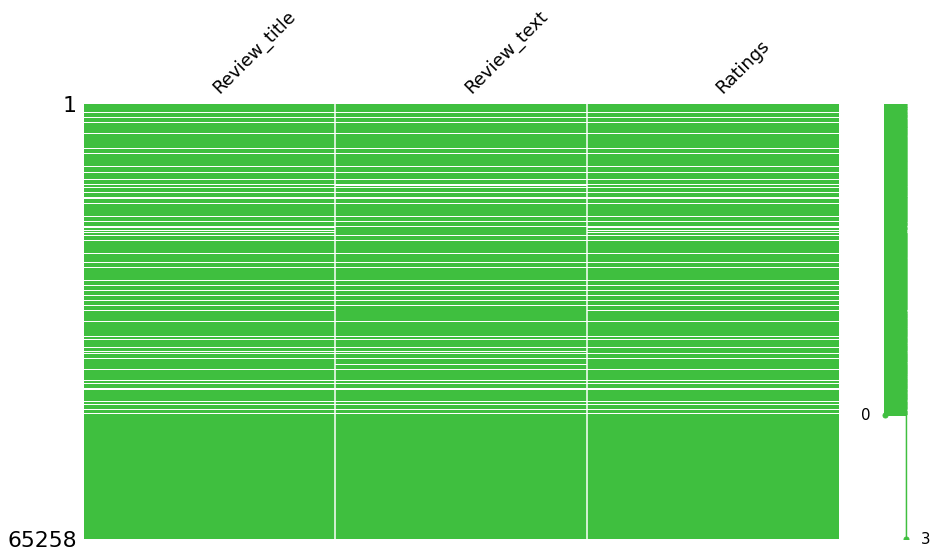

In [9]:
missingno.matrix(df, figsize = (15,8), color=(0.25, 0.75, 0.25), fontsize=18)

In [10]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 65258 Rows and 3 Columns in our dataframe before removing NaN
We have 56912 Rows and 3 Columns in our dataframe after removing NaN


In [11]:
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56912 entries, 0 to 65257
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  56912 non-null  object
 1   Review_text   56912 non-null  object
 2   Ratings       56912 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [13]:
df['Ratings'].unique()

array(['5.0 out of 5 stars', '2.0 out of 5 stars', '3.0 out of 5 stars',
       '1.0 out of 5 stars', '4.0 out of 5 stars', '5', '4', '1', '3',
       '2'], dtype=object)

Looking at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)

In [14]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([5, 2, 3, 1, 4])

So we were able to incorporate the string object datatype values with numeric star values and the target column is clean with integer data in it.

In [15]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Nice looks and quick responsive.,Purchased it on the 1st day and it’s a very go...,5,Nice looks and quick responsive. Purchased it ...
1,Light weighted and fast,Very fast and good looking. Processsor speed i...,5,Light weighted and fast Very fast and good loo...
2,Laptop bag missing,Laptop bag missing,2,Laptop bag missing Laptop bag missing
3,Okayish,"Performance wise it's okay , it's been only a ...",2,"Okayish Performance wise it's okay , it's been..."
4,Low quality,Performance issue,2,Low quality Performance issue
...,...,...,...,...
65253,Best in the market!,Nice product ☺️👍,5,Best in the market! Nice product ☺️👍
65254,Best in the market!,Lovely watch with mobile like features.....jus...,5,Best in the market! Lovely watch with mobile l...
65255,Delightful,Nice,4,Delightful Nice
65256,Highly recommended,superb watch smooth and classic👌👌👌👌👌\now super...,5,Highly recommended superb watch smooth and cla...


I have combined the columns Review_title and Review_text to create a new column called Review that has the consolidated comments.

In [16]:
df['Review'][0]

'Nice looks and quick responsive. Purchased it on the 1st day and it’s a very good product as written all the functions are working and response time is very quick ,loved it as my 2 nd and 1 from my own salary'

In [17]:
df['Review'][1]

'Light weighted and fast Very fast and good looking. Processsor speed is good, display panel is awesome 👌'

In [18]:
df['Review'][2]

'Laptop bag missing Laptop bag missing'

### Text Processing to remove unwanted punctuations and special characters

In [20]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

import re
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

F:\python\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: The default value of regex will change from True to False in a future version.


In [21]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Lemmatization

In [24]:
# Defining function to convert nltk tag to wordnet tags
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

### Text Normalization - Standardization

In [25]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

### Word Counts

In [26]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,20,nice look quick responsive purchase st day goo...
1,12,light weight fast fast good look processsor sp...
2,6,laptop bag miss laptop bag miss
3,21,okayish performance wise okay month already st...
4,4,low quality performance issue
5,9,key work key stop work within month use
6,24,basic use also support friend use laptop since...
7,12,important information plan install additional ...
8,30,bettry avrage max hour bettry backup mention...
10,6,accessory available box accessory available box


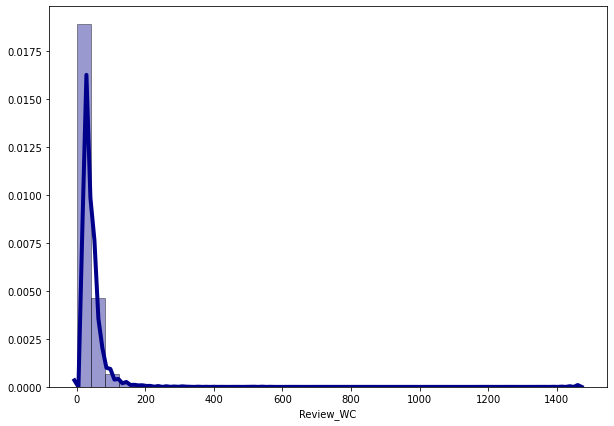

In [27]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

### Character Counts

In [28]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,112,nice look quick responsive purchase st day goo...
1,76,light weight fast fast good look processsor sp...
2,31,laptop bag miss laptop bag miss
3,133,okayish performance wise okay month already st...
4,29,low quality performance issue
5,40,key work key stop work within month use
6,136,basic use also support friend use laptop since...
7,99,important information plan install additional ...
8,150,bettry avrage max hour bettry backup mention...
10,47,accessory available box accessory available box


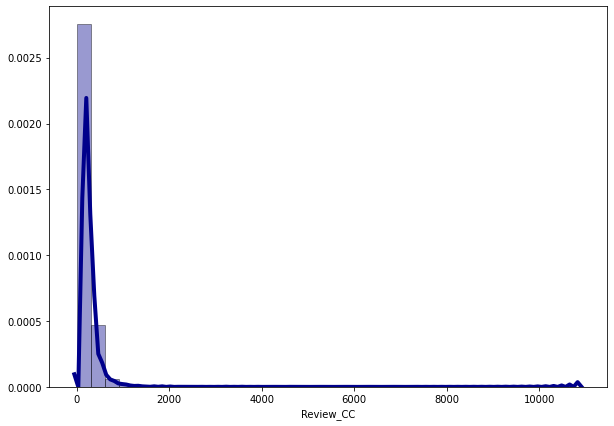

In [29]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

## Removing Outliers

In [30]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 56045 Rows and 6 Columns in our dataframe after removing outliers


As we know that some of the review are too lengthy I am removing those reviews from the data as outliers using Z score method. By removing outliers we are loosing only arround 1000 entries which is acceptable here for getting beter results for our model.

## Visualization

### Plotting histograms for word count and character count again after removing the outliers

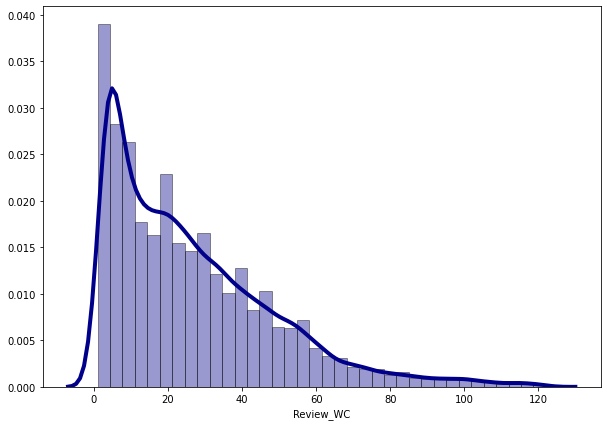

In [31]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.

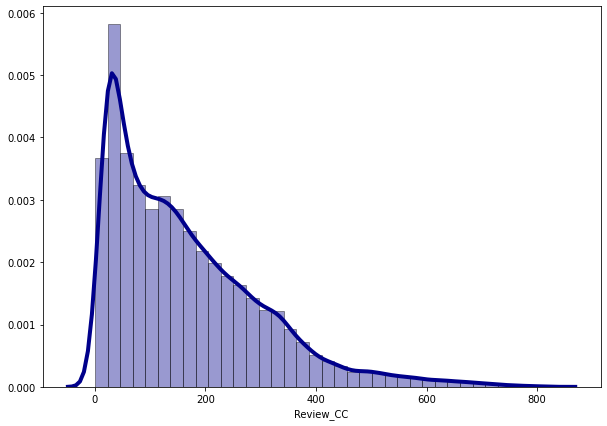

In [32]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.

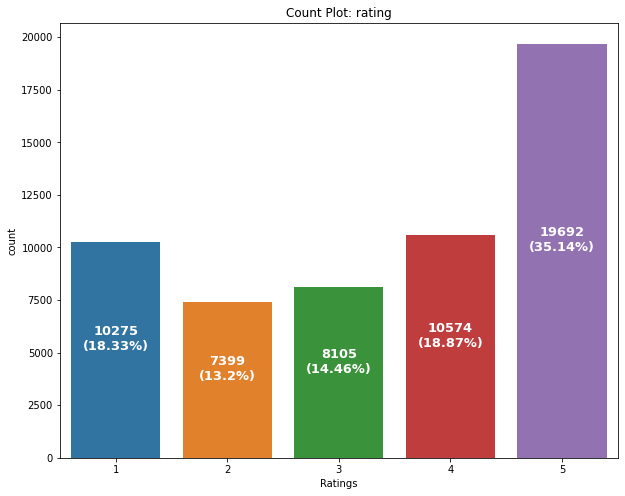

In [33]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

<b>Observation:</b>

* We can see that the highest number of customer rating received are for 5 stars
* Then we have 4 star rating reviews present in our dataset
* However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

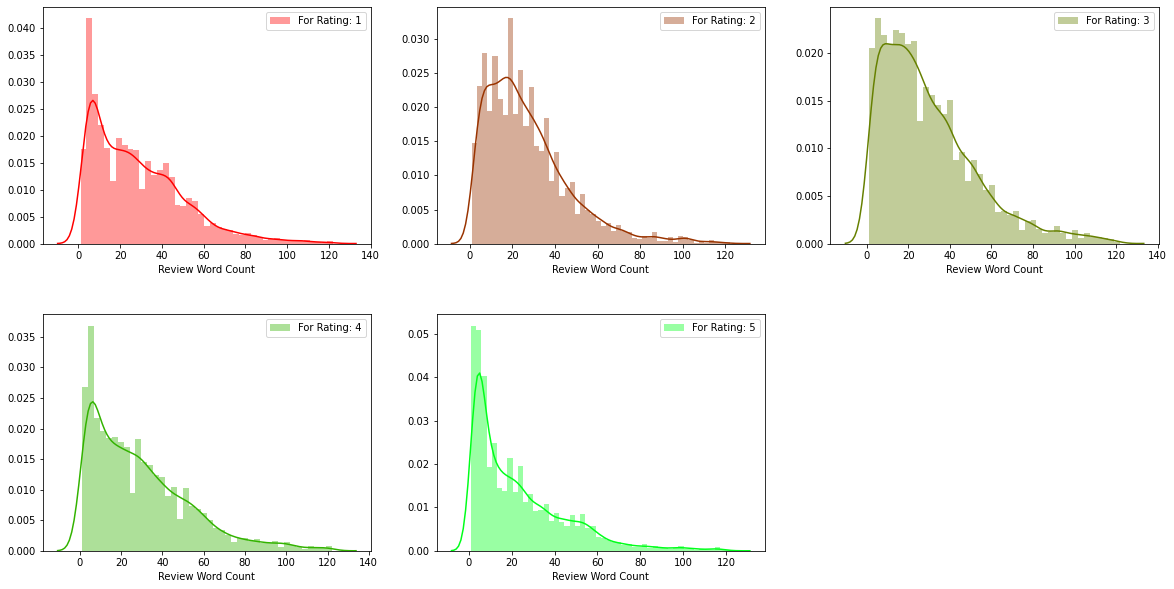

In [34]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

<b>Observation:</b> 
    
The above word count histogram+distributions for each and every rating shows that when people are disappointed with a service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express the joy of having got a great product.

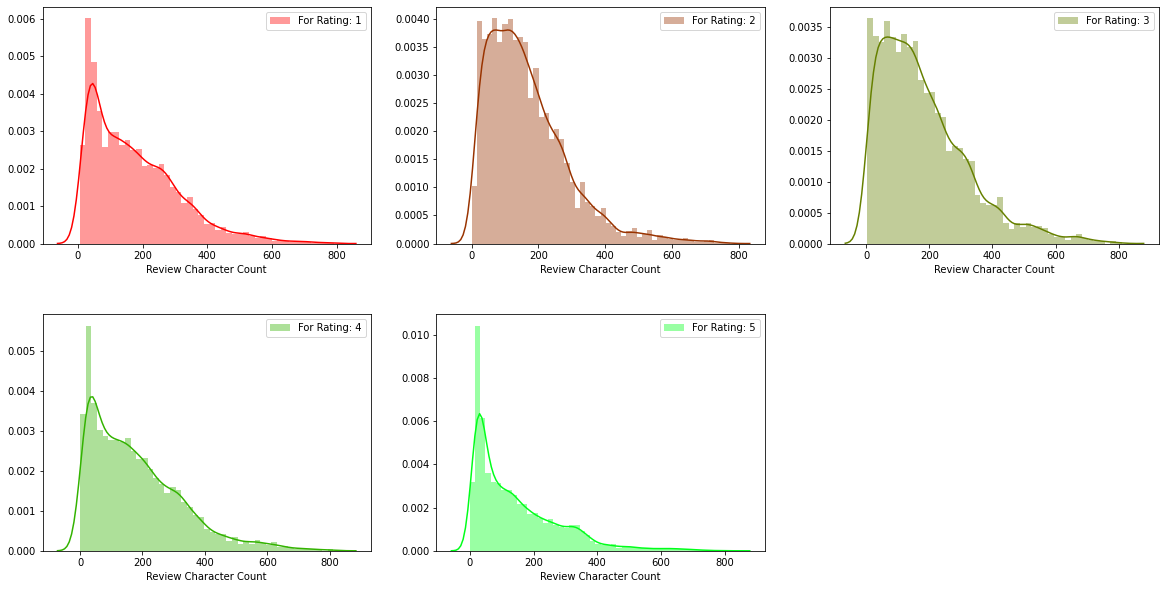

In [35]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

<b>Observation:</b> 
    
Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have lesser character counts on their comments when compared to the lower rating details.

### Displaying loud words with Word Cloud information

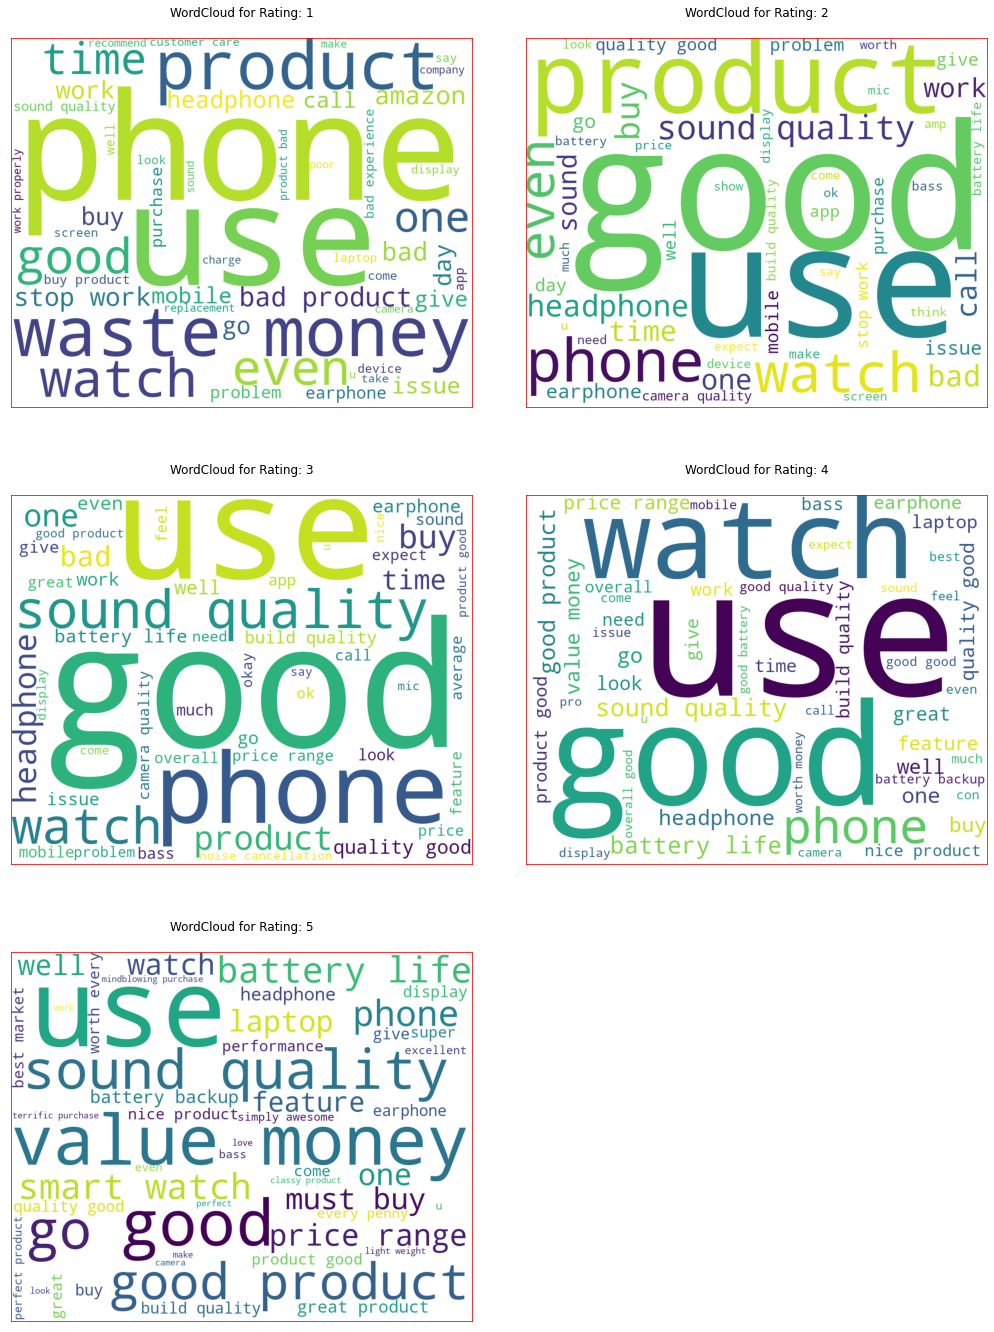

In [36]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

<b>Observation:</b>

For Rating: 1

It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc.

For Rating: 2

It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc.

For Rating: 3

It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc.

For Rating: 4

It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc.

For Rating: 5

It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc.

5    19692
4    10574
1    10275
3     8105
2     7399
Name: Ratings, dtype: int64


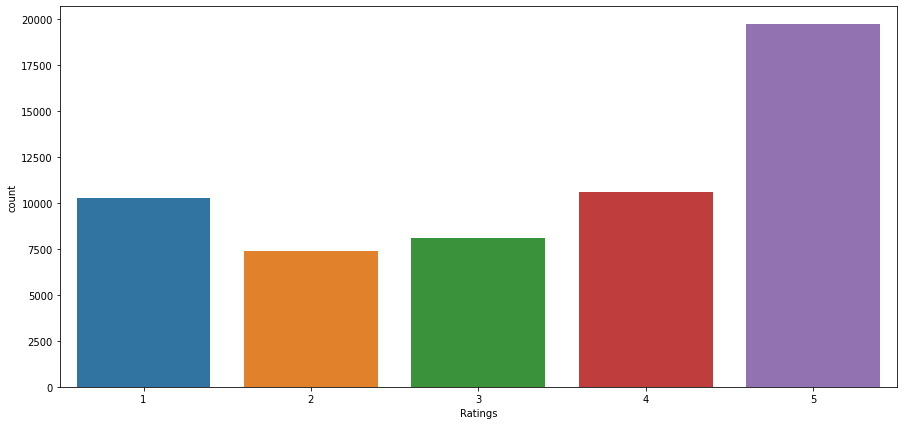

In [38]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

<b>Observation:</b>

* Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
* Which will cause the Imbalance problem for our Machine Learning model and make it bias.
* So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
* For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
* Then I will select equal number of data of every category and ensure that the rating values are balanced

In [40]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,"Poor quality do not buy, you will regret after...","Don't buy it broke in 2 months , it handled ve...",2,poor quality buy regret buying buy break mont...,59,370
1,Don't purchase,air blower is not Good or Soft,1,purchase air blower good soft,5,29
2,Best in the market!,Chief &best,5,best market chief best,4,22
3,Worth the money,Super smooth functioning with a great OLED dis...,4,worth money super smooth functioning great ole...,8,55
4,Don't buy this...This is not a smart watch... ...,No notification received while receiving calls...,1,buy thisthis smart watch costly smart band not...,52,323
...,...,...,...,...,...,...
56040,Awesome,Go for stainless steel if you want to add a vi...,5,awesome go stainless steel want add vintage ty...,19,136
56041,Mind-blowing purchase,Nice,5,mindblowing purchase nice,3,25
56042,Waste of money,After seeing so many review i bought this watc...,1,waste money see many review buy watch use hal...,96,544
56043,Really Nice,Good,4,really nice good,3,16


In [41]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Mind-blowing purchase,Good item and looking very smart,5,mindblowing purchase good item look smart,6,41
1,Just wow!,Many people are afraid to buy new company prod...,5,wow many people afraid buy new company product...,37,244
2,Honest review based on real experience-,#JBL Headphone-<br>Strong points-<br>1.Branded...,4,honest review base real experience jbl headpho...,50,298
3,Go for some other brand phones,Please go for realme c3. Don't go for this pho...,4,go brand phone please go realme c go phone rea...,33,186
4,Nice product,Pros:\n1)Superb display (FHD)\n2)Looks awesome...,4,nice product pro superb display fhd looks awes...,33,166
...,...,...,...,...,...,...
36775,Good quality product,If u r looking a laptop for study purpose u ca...,4,good quality product u r look laptop study pur...,13,75
36776,Brilliant,Most loved product of realme,5,brilliant love product realme,4,29
36777,Good,Amazing product nice quality,4,good amazing product nice quality,5,33
36778,Network issues,This phone has poor network reception. Network...,1,network issue phone poor network reception net...,9,65


5    7356
4    7356
1    7356
3    7356
2    7356
Name: Ratings, dtype: int64


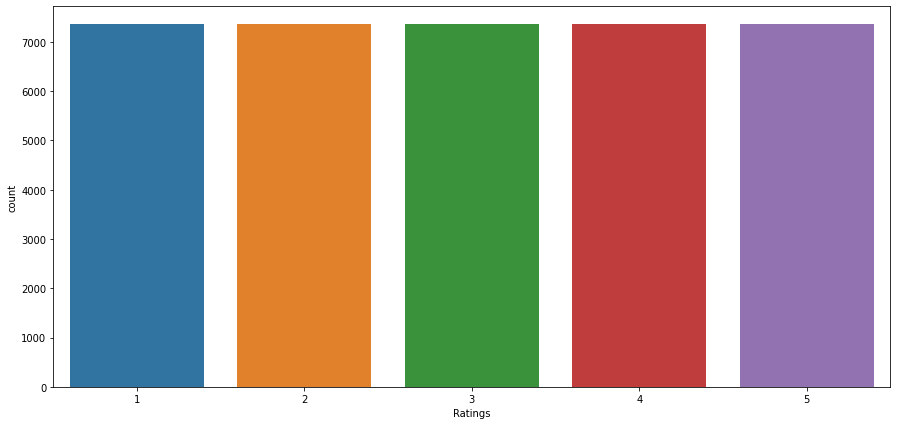

In [42]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

we have balanced our data successfully.

### Top 30 most frequently occuring words

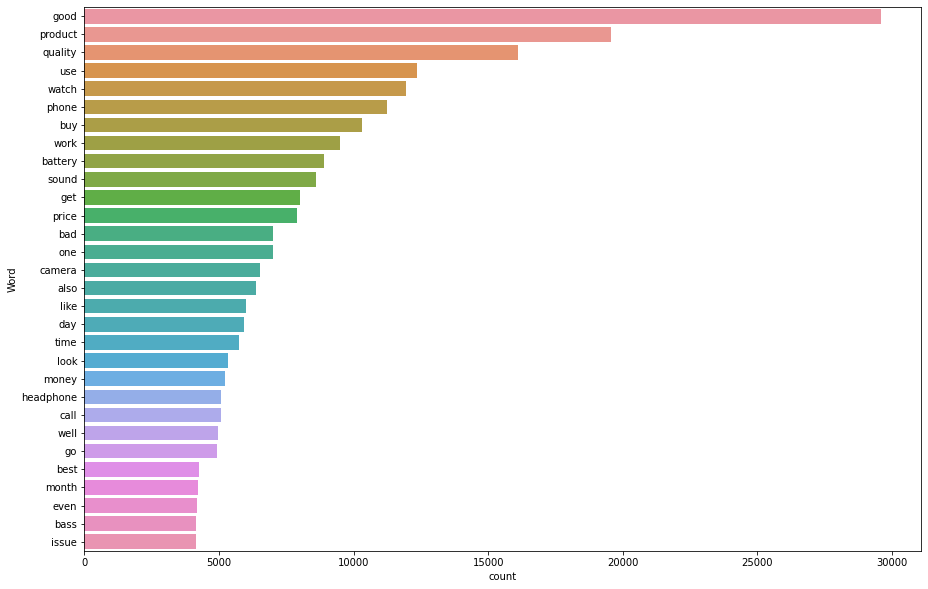

In [43]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])   

### Top 30 rarely occuring words

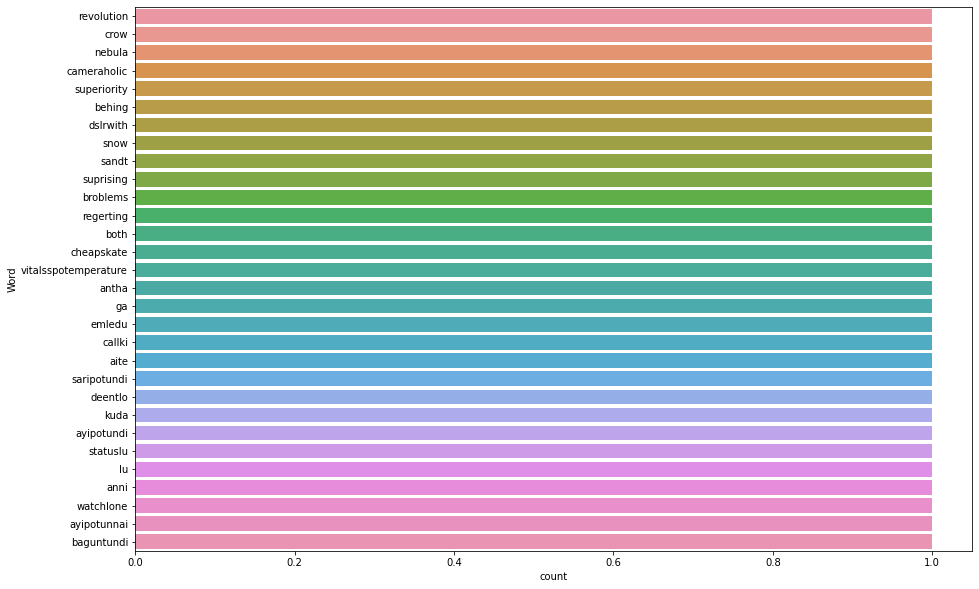

In [44]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])  

## Model Building and Evaluation Metrics

In [45]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

### Converting text into vectors using TfidfVectorizer

In [47]:
# Using the n_gram tfidf vectorizer (Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

F:\python\lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  "The parameter 'stop_words' will not be used"


### Splitting the data into train and test datasets

In [49]:
from sklearn.model_selection import train_test_split

state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (25746, 150000)
x_test (11034, 150000)
y_train (25746,)
y_test (11034,)


In [54]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

In [57]:
# Defining the Classification Machine Learning Algorithms
lr = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [58]:
for model in [lr,mnb,dtc,rf]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 71.27968098604313
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.76      0.78      0.77      2224
           2       0.65      0.66      0.65      2219
           3       0.66      0.63      0.65      2226
           4       0.67      0.71      0.69      2180
           5       0.84      0.79      0.81      2185

    accuracy                           0.71     11034
   macro avg       0.71      0.71      0.71     11034
weighted avg       0.71      0.71      0.71     11034

CONFUSION MATRIX: 
 [[1732  330  115   33   14]
 [ 331 1456  300  101   31]
 [ 147  318 1412  293   56]
 [  45  103  249 1544  239]
 [  18   49   62  335 1721]]

------------------------------------------------------------------------------------------------------------------------


******************************MultinomialNB******************************
ACC

We can see that the accuracy scores for LogisticRegression and RandomForestClassifier algorithms are above 70% range and we shall cross validate them to choose the best scored classification algorithm amongst them.

## Cross validation score for best score models

In [59]:
from sklearn.model_selection import cross_val_score
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,mnb,dtc,rf]:
    cross_val(model) 

******************************LogisticRegression******************************
Cross validation score: 70.30723219140839


******************************MultinomialNB******************************
Cross validation score: 63.79825992387168


******************************DecisionTreeClassifier******************************
Cross validation score: 63.27079934747145


******************************RandomForestClassifier******************************
Cross validation score: 70.63621533442088




We can see that RandomForestClassifier has produced the best outcome and we shall use it for further tuning the accuracy percentage.

## HyperParameter Tuning

In [60]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
from sklearn.model_selection import GridSearchCV
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.674 total time=15.1min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.683 total time=17.4min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.672 total time=17.2min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.679 total time=32.3min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.693 total time=33.0min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.672 total time=26.6min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.675 total time=12.8min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.683 total time=12.1min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [61]:
# Selecting the best parameters found by GridSearchCV
GSCV.best_params_ 

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 800, 'n_estimators': 200}

In [62]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=True, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 71.02591988399493

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.74      0.80      0.77      2224
           2       0.66      0.65      0.66      2219
           3       0.69      0.61      0.65      2226
           4       0.65      0.72      0.68      2180
           5       0.82      0.77      0.80      2185

    accuracy                           0.71     11034
   macro avg       0.71      0.71      0.71     11034
weighted avg       0.71      0.71      0.71     11034


CONFUSION MATRIX: 
 [[1769  292   94   47   22]
 [ 367 1444  249  124   35]
 [ 169  301 1363  330   63]
 [  61   97  200 1568  254]
 [  27   43   74  348 1693]]


## Saving the best model

In [64]:
import joblib
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

## Loading the final model

In [65]:
Model = joblib.load("Rating_Prediction_Saved_Model.pkl")

In [66]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,1,5
1,4,5
2,2,4
3,4,4
4,2,4
...,...,...
11029,4,3
11030,1,1
11031,5,5
11032,5,1


In [67]:
# Converting the dataframe into CSV format and saving it
results.to_csv('PredictedvsActual_Ratings_Results.csv', index=False)